### Problem 4.3

In [17]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pickle


In [11]:
path = '/Users/aaryansharma/Downloads/SMAI-Dataset-problem-4.3/colors.pkl'
colors_data = pickle.load(open(path, 'rb'))
colors_data.shape

(100, 2)

In [12]:
print(colors_data)

[[-2.31638050e+00  1.26969612e+02]
 [ 1.43003789e+00  1.27063470e+02]
 [-5.39587093e-01  1.25897475e+02]
 [ 8.82056170e-02  1.25327145e+02]
 [-1.41889010e+00  1.27049518e+02]
 [ 9.66290690e-01  1.27235673e+02]
 [-1.35840746e-01  1.27498257e+02]
 [ 1.69478101e-01  1.29486548e+02]
 [ 1.00847567e+00  1.26187844e+02]
 [-1.41722056e+00  1.25884563e+02]
 [ 1.36222888e-01  1.26846716e+02]
 [-1.97722313e+00  1.26074635e+02]
 [ 7.10850944e-01  1.27439980e+02]
 [ 2.87579889e+00  1.27482732e+02]
 [ 1.87622882e-01  1.28141428e+02]
 [ 1.35391312e+00  1.26752882e+02]
 [ 5.71283901e-01  1.26553203e+02]
 [ 4.93088229e-01  2.54571943e+02]
 [ 8.85417745e-01  2.54739842e+02]
 [ 1.21842399e+00  2.56128363e+02]
 [-1.35907317e+00  2.53083402e+02]
 [ 1.57709750e+00  2.54950866e+02]
 [-1.43345420e+00  2.54619629e+02]
 [-8.62171848e-01  2.54697716e+02]
 [ 2.35184832e+00  2.54316838e+02]
 [-4.64219271e-01  2.53554854e+02]
 [ 1.27830010e+02 -4.59093017e-01]
 [ 1.25984932e+02 -1.44428999e+00]
 [ 1.27287778e+02 -2

In [13]:
gmm = GaussianMixture(n_components=7, covariance_type='full', random_state=0)

gmm.fit(colors_data)

print(gmm.means_)
print(gmm.covariances_)
print(gmm.weights_)




[[ 1.27172922e+02  1.26605367e+02]
 [ 2.54828851e+02 -2.08589583e-01]
 [ 2.67439699e-01  2.54518161e+02]
 [ 2.55165668e+02  1.27358500e+02]
 [ 1.27065742e+02 -8.44575440e-02]
 [ 9.95904977e-02  1.26934805e+02]
 [ 1.26931688e+02  2.54851953e+02]]
[[[ 1.19754533 -0.01923169]
  [-0.01923169  1.70463777]]

 [[ 0.38531507 -0.21305776]
  [-0.21305776  0.64412607]]

 [[ 1.63856537  0.49894624]
  [ 0.49894624  0.65573231]]

 [[ 1.02962802 -0.03525602]
  [-0.03525602  0.57207645]]

 [[ 0.72802356  0.03254854]
  [ 0.03254854  1.04653338]]

 [[ 1.6740466   0.30152784]
  [ 0.30152784  0.89468541]]

 [[ 1.09300903  0.05372962]
  [ 0.05372962  0.93233538]]]


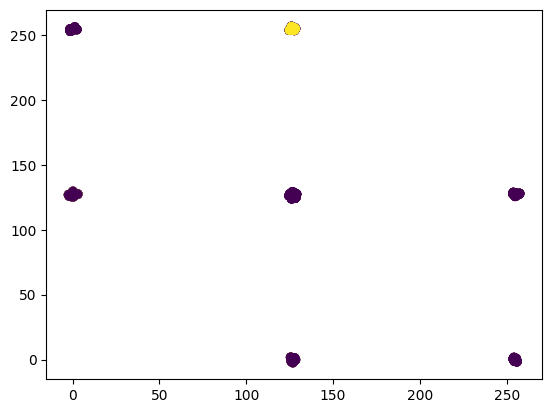

In [15]:
responsibilities = gmm.predict_proba(colors_data)
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown']
for i in range(7):
    plt.scatter(colors_data[:, 0], colors_data[:, 1], c=responsibilities[:, i], cmap='viridis')
plt.show()

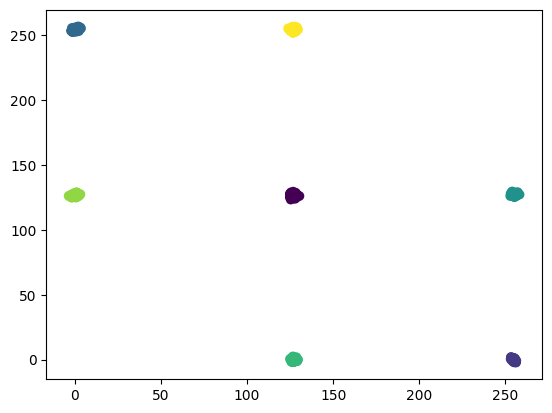

In [16]:
# np.random.multivariate_normal(gmm.means_[0], gmm.covariances_[0], 1)
no_samples = 100
def generate_sample_dataset(n, means, covariances, num_samples_per_component=10):

    points = []
    labels = []

    for index in range(n):
        # Generate samples for the current component
        component_data = np.random.multivariate_normal(
            means[index], covariances[index], num_samples_per_component
        )
        component_labels = np.full(num_samples_per_component, index)

        # Append to the dataset
        points.append(component_data)
        labels.append(component_labels)

    points = np.vstack(points)
    labels = np.hstack(labels)

    return points, labels

points, labels = generate_sample_dataset(7, gmm.means_, gmm.covariances_, no_samples)

plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis')
plt.show()


